In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
os.environ["export CUDA_VISIBLE_DEVICES"] = '0'

In [3]:
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE,SMOTEN

file_train = pd.read_excel("train.xlsx").fillna(value=0)
file_test = pd.read_excel("test.xlsx").fillna(value=0)
file_train["Glucose"] = file_train["Glucose"].apply(lambda x: 0 if type(x) == str else float(x))
file_train["BUN"] = file_train["BUN"].apply(lambda x: 0 if type(x) == str else float(x))
file_test["Glucose"] = file_test["Glucose"].apply(lambda x: 0 if type(x) == str else float(x))
file_test["BUN"] = file_test["BUN"].apply(lambda x: 0 if type(x) == str else float(x))
file_test["Group"] = file_test["Group"].apply(lambda x: 1 if x == "FHR" else 0)
file_train["Group"] = file_train["Group"].apply(lambda x: 1 if x == "FHR" else 0)


x_test = file_test.iloc[:, :-1]
y_test = file_test["Group"].astype(np.int64)

x_test = np.array(x_test)
y_test = np.array(y_test)
# std_x_train = StandardScaler().fit_transform(x_train)
# std_x_test = StandardScaler().fit_transform(x_test)

## 划分自变量与因变量

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
train_dataset, val_dataset = train_test_split(file_train, test_size = 0.2, random_state = 666, shuffle=True)
train_dataset.shape

# train.xlsx
train_value = train_dataset.values
val_value = val_dataset.values
x_train, y_train = train_value[:,:-1], train_value[:,-1]
x_val, y_val = val_value[:,:-1], val_value[:,-1]

## 数据处理 --- 中心化

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_train = normalize(x_train)

x_val =  scaler.fit_transform(x_val)
x_val = normalize(x_val)

x_test = scaler.transform(x_test)
x_test = normalize(x_test)

## 模型一搭建

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(17,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.summary()

In [7]:
# 模型一编译与训练
from tensorflow.keras.callbacks import ReduceLROnPlateau
model.compile(loss="binary_crossentropy", optimizer='adam',
                metrics=['acc','AUC'])
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=20, verbose=1)
# model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='models/ep{epoch:03d}-loss{loss:.3f}-loss{loss:.3f}.h5',
#                                                    monitor='loss',
#                                                    verbose=1,
#                                                    save_best_only=True,
#                                                    save_weights_only=True,
#                                                    save_freq=1)
# ReduceLR = ReduceLROnPlateau(factor=0.1, min_lr=0.001, monitor='loss', verbose=1)
                

In [12]:
# 模型一训练
# history = model.fit(x_train, y_train, epochs=1000, batch_size=10) #validation_data=(x_val, y_val)
# callbacks=[early_stopping, model_checkpoint, ReduceLR]
history = model.fit(x_train, y_train, batch_size=10, epochs=10,
                    validation_data=(x_val, y_val))
model.evaluate(x=x_test, y=y_test)

Train on 239 samples, validate on 60 samples
Epoch 1/10
239/239 [==============================] - 0s 201us/sample - loss: 0.3610 - acc: 0.8410 - AUC: 0.8474 - val_loss: 0.7608 - val_acc: 0.6833 - val_AUC: 0.4848
Epoch 2/10
239/239 [==============================] - 0s 144us/sample - loss: 0.3517 - acc: 0.8452 - AUC: 0.8572 - val_loss: 0.7488 - val_acc: 0.6833 - val_AUC: 0.4927
Epoch 3/10
239/239 [==============================] - 0s 133us/sample - loss: 0.3447 - acc: 0.8410 - AUC: 0.8668 - val_loss: 0.7534 - val_acc: 0.6833 - val_AUC: 0.4954
Epoch 4/10
239/239 [==============================] - 0s 132us/sample - loss: 0.3357 - acc: 0.8452 - AUC: 0.8757 - val_loss: 0.7731 - val_acc: 0.6833 - val_AUC: 0.4960
Epoch 5/10
239/239 [==============================] - 0s 128us/sample - loss: 0.3271 - acc: 0.8494 - AUC: 0.8902 - val_loss: 0.7624 - val_acc: 0.6833 - val_AUC: 0.5073
Epoch 6/10
239/239 [==============================] - 0s 131us/sample - loss: 0.3168 - acc: 0.8536 - AUC: 0.9019 - 

[0.6932654241835681, 0.74181116, 0.5065741]

## 获知训练和验证结果

accuary:0.8284518718719482


<Figure size 432x288 with 0 Axes>

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


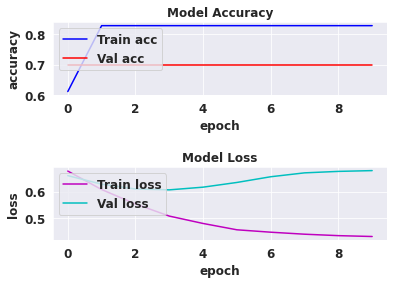

In [9]:
from pylab import mpl
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='snow')
sns.set_style("darkgrid", {"font.sans-serif": ['simhei', 'Droid Sans Fallback','Times New Roman']})
font_size = 12
font_family = "SimHei"
font_weight = "bold"
plt.rc("font", size=font_size, family=font_family, weight=font_weight)
font2 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 12,
}
print()
val_accuracy=history.history['acc'][-1]
accuracy=history.history['val_acc'][-1]
print("accuary:{}".format(max(val_accuracy,accuracy)))
s, (one, two) = plt.subplots(2, 1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=1)
one.plot(history.history['acc'], c='b')
one.plot(history.history['val_acc'], c='r')
one.set_title('Model Accuracy',font2)
one.set_ylabel("accuracy" ,font2)
one.set_xlabel("epoch" ,font2)
one.legend(['Train acc', 'Val acc'], loc='upper left')

two.plot(history.history['loss'], c='m')
two.plot(history.history['val_loss'], c='c')
two.set_title('Model Loss', font2)
two.set_ylabel('loss', font2)
two.set_xlabel('epoch', font2)
two.legend(['Train loss', 'Val loss'], loc='upper left')

## 模型在test上预测

In [11]:
model.evaluate(x=x_test, y=y_test)
y_pred = model.predict(x_test)
y_pred = [ 0 if y <0.5 else 1for y in y_pred]
y_pred

519/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


## 模型性能评估

In [11]:
# 模型性能评估
from sklearn.metrics import confusion_matrix
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.subplots as tls
import plotly.figure_factory as ff

def show_matrics(y_test, y_pred):
    # 计算混淆矩阵
    conf_matrix = confusion_matrix(y_test, y_pred)
    trace1 = go.Heatmap(z = conf_matrix, x = ["0(pred)", "1(pred)"],
                       y = ["0(True)", "1(True)"], xgap = 2, ygap = 2,
                       colorscale = 'Viridis', showscale = False)
    # 根据混淆矩阵，获取对应的参数值
    TP = conf_matrix[1, 1]
    FN = conf_matrix[1, 0]
    FP = conf_matrix[0, 1]
    TN = conf_matrix[0, 0]
    
    # 计算accuracy, precision, recall, f1_score
    accuracy = (TP + TN) / (TP + TN + FP + FN) # 准确率
    precision = TP / (TP + FP) # 精准率
    recall = TP / (TP + FN) # 召回率
    F1_score = 2 * precision * recall / (precision + recall)
    
    # 显示以上四个指标
    show_metrics = pd.DataFrame(data = [[accuracy, precision, recall, F1_score]])
    show_metrics = show_metrics.T
    
    # 可视化显示
    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = show_metrics[0].values,
                    y = ['Accuracy', 'Precision', 'Recall', 'F1_score'],
                    text = np.round_(show_metrics[0].values, 4),
                    textposition = 'auto',
                    orientation = 'h',
                    opacity = 0.8,
                    marker = dict(color = colors, line = dict(color="#000000", width=1.5)))
    
    fig = tls.make_subplots(rows=2, cols=1, subplot_titles=('Confusion Matrix', 'Metrics'))
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 2, 1)
    py.iplot(fig)


show_matrics(y_test.squeeze(), y_pred)